## About this Project
This project aims to study healthcare quality and cost within the 35 OECD country members with a special focus on the US economy.

### Data Sources
- OECD organization
- World Bank

### Project Structure
The study is split in two phases:
- OECD_Healthcare_DataProcess Notebook: processes the various sources of information into a single database for a later access and analysis
- OECD_Healthcare_Analysis Notebook: analyzes the data aiming to achieve the goals previously described


##  About this particular Notebook
This notebook retrieves the data stored in the previous notebook on SQLite and analyzes and compares healthcare in the US vs the rest of the OECD members from a cost and quality perspective

### Index
1. [Modules](#1.)
2. [Data Analysis](#2.)
    1. [Retrieve dataframes](#2.1)
    2. [Analize Healthcare Cost](#2.2)
        1. [Healthcare Cost results](#2.2.1)
        2. [Correlation between GDP pc level and Cost](#2.2.2)
    3. [Analyze Health Scores](#2.3)
        1. [Healthcare scores results](#2.3.1)
        2. [Healthcare score rankings](#2.3.2)
        3. [Correlation between GDP per capita and Health Score](#2.3.3)
    4. [Analyze Health Cost against Health Score](#2.4)
    5. [Conclusion](#2.5)

# Code

## 1. Modules <a id='1.'></a>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as lite
import seaborn as sns
import math
import numpy as np
from adjustText import adjust_text
import matplotlib.patches as mpatches
from matplotlib.ticker import AutoMinorLocator
from matplotlib import cm

## 2. Data Analysis  <a id='2.'></a>

### 2.A Retrieve dataframes <a id='2.1'></a>

In the previous notebook we extracted, processed and stored healthcare data on a SQLite database, ready to be used for our analysis.

Now we are going to retrieve the information back into three pandas dataframes:

<b>'data'</b>: this dataframe is indexed by year and contains for each country and GDP group the following categories and variables:

Health Cost:
- Cost USD per capita (USD)
- Cost increase (yearly)
- Cost per capita (national currency)
- GDP share (% of total GDP)
- Inflation (%)

Health Quality:
- Life expectancy (avg. years)
- Mortality (deaths per 100k population)
- Maternal Mortality (rate per 100k live births)
- Infant Mortality (rate by 1k live births)

<b>'scores'</b>: contains for each country and GDP group, and for each year the healthcare score

<b>'classifiers'</b>: contains for each country the average GDP per capita and GDP group that the country belongs to.

In [46]:
con = lite.connect('Healthcare.db')

data = pd.read_sql_query('''SELECT * FROM indicators''', con, index_col='Year')
data.columns = pd.MultiIndex.from_tuples([eval(x) for x in data.columns])

scores = pd.read_sql_query('''SELECT * FROM scores''', con, index_col='Year')

classifiers = pd.read_sql_query('''SELECT * FROM classifiers''', con, index_col='LOCATION')

Once retrieved from SQLite the main dataframe (data) looks like this for any given country

In [47]:
data['USA']

Health Expenses                                                           \
             Cost pc GDP share Inflation  Cost USD pc Cost increase  Cost gap   
Year                                                                            
2000       4558.9524   12.5075  3.376857  4788.311560      8.104676  4.727819   
2001       4910.6156   13.1745  2.826171  5140.229361      7.713684  4.887513   
2002       5327.8052   13.9595  1.586032  5575.829831      8.495668  6.909636   
2003       5737.4608   14.4603  2.270095  5995.082226      7.689012  5.418917   
2004       6096.5355   14.5426  2.677237  6369.431108      6.258425  3.581188   
2005       6445.7053   14.5475  3.392747  6741.033681      5.727348  2.334601   
2006       6809.4762   14.6639  3.225944  7122.366441      5.643617  2.417673   
2007       7163.1718   14.9042  2.852673  7511.962988      5.194168  2.341495   
2008       7414.0435   15.3178  3.839100  7786.211902      3.502243 -0.336857   
2009       7684.7611   16.3500 -0.355546  8022.998025      3.651416  4.006963   
2010       7929.3720   16.3918  1.640043  8269.365181      3.183064  1.543021   
2011       8171.0784   16.4139  3.156842  8523.833686      3.048241 -0.108601   
2012       8422.9900   16.3771  2.069337  8789.767513      3.082966  1.013629   
2013       8617.4287   16.3678  1.464833  8987.901487      2.308428  0.843595   
2014       9024.2064   16.5865  1.622223  9402.536971      4.720407  3.098184   

     Health Quality                           
           Inf mort Life exp Mat mort   Mort  
Year                                          
2000            6.9     76.7     12.0  994.6  
2001            6.8     76.8     13.0  976.1  
2002            7.0     76.9     13.0  964.4  
2003            6.8     77.1     13.0  950.0  
2004            6.8     77.4     13.0  912.8  
2005            6.9     77.4     13.0  910.3  
2006            6.7     77.7     14.0  884.8  
2007            6.8     77.9     14.0  872.9  
2008            6.6     78.1     14.0  868.0  
2009            6.4     78.5     15.0  838.8  
2010            6.1     78.6     14.0  835.3  
2011            6.1     78.7     14.0  832.0  
2012            6.0     78.8     14.0  824.1  
2013            6.0     78.8     14.0  826.2  
2014            6.0     78.8     14.0  826.2

### 2.B Analyze Healthcare Cost <a id='2.2'></a>

We will start analyzing the cost of healthcare. The idea is to plot the evolution between 2000-2014 of the different cost indicators for the US compared to the average of each group by GDP per capita.

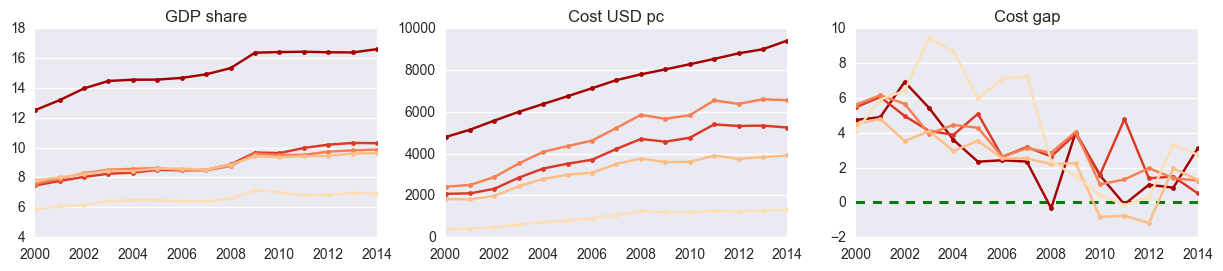

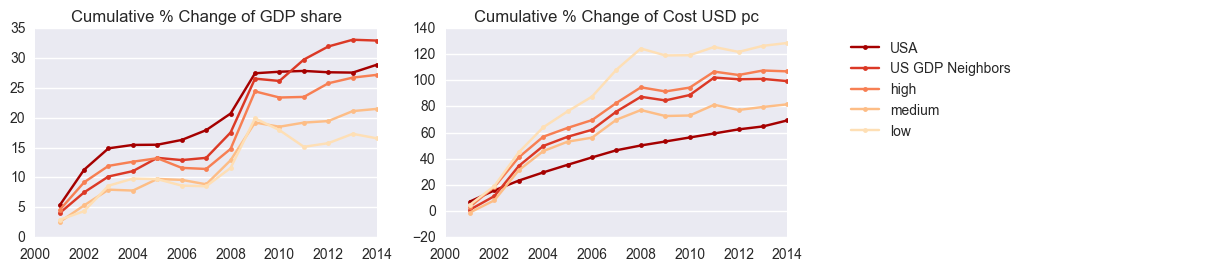

In [48]:
%matplotlib inline
selection = ['USA', 'US GDP Neighbors', 'high', 'medium', 'low']
cst_vars = ['GDP share', 'Cost USD pc', 'Cost gap']
ctries = data.columns.levels[0].tolist()

idx = pd.IndexSlice
colors = sns.color_palette("OrRd_r", 10)[::2]

sns.set_style('darkgrid')
plt.figure()
fig, ax = plt.subplots(1, 3, figsize=(15,2.7))

for var, ax in zip(cst_vars, ax):
    
    for ctry, c in zip(selection, colors):
        ax.plot(
                data.loc[:, idx[ctry, 'Health Expenses', var]]
                , c=c,
                marker='.'
               )
        ax.set_title(var)
        ax.grid(b=None, axis='x')
        if var == 'Cost gap':
            ax.axhline(0, linewidth=2, linestyle='--', color='green', zorder=1, label='_nolegend_')

plt.show()

plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,2.7))

for var, ax in zip(cst_vars[:2], [ax1, ax2, ax3]):
    
    for ctry, c in zip(selection, colors):
        ax.plot(
                data.loc[:, idx[ctry, 'Health Expenses', var]].pct_change().cumsum()*100,
                c=c,
                marker='.'
                )
        ax.set_title('Cumulative % Change of ' + var)
        ax.grid(b=None, axis='x')
    ax2.legend(selection, loc=2, bbox_to_anchor=(1.15, 1), ncol=1)
    ax3.axis('off')

plt.show()

In [49]:
data = data.sortlevel(axis=1)
for var in ['GDP share', 'Cost USD pc']:
    for year in [2000,2014]:
        US = data.loc[year, idx['USA', 'Health Expenses', var]]
        US_neigh = data.loc[year, idx['US GDP Neighbors', 'Health Expenses', var]]
        print "{} ratio US neighbors vs the US in {} is: {}".format(var, year, US_neigh/US)
    
print data.loc[2014, idx[ctries, ('Health Expenses'), ('GDP share')]].sort_values(ascending=False).head(2)
 

GDP share ratio US neighbors vs the US in 2000 is: 0.596991804917
GDP share ratio US neighbors vs the US in 2014 is: 0.620800048232
Cost USD pc ratio US neighbors vs the US in 2000 is: 0.433557257803
Cost USD pc ratio US neighbors vs the US in 2014 is: 0.557819169945
USA  Health Expenses  GDP share    16.5865
CHE  Health Expenses  GDP share    11.3991
Name: 2014, dtype: float64


### 2.B.a Healthcare Cost results <a id='2.2.1'></a>

<b>GDP share results</b>
* The main takeaway is that the US dedicates significantly more of its GDP to healthcare than any other country. This is particularly striking when compared to its closest GDP neighbors with a gap of aprox. 6 points (that is 62% higher than it's neighbors). Practically the same difference we had in 2000 (59%). By 2014, US healthcare expenditure is 16.6% of the GDP. The next country with the highest share is Switzerland, with 11.4%. So the US doesn't only get the highest result, it gets that result by far.


* Looking at the cumulative variation we observe a general upward trend closely linked to the GDP pc: a higher GPD pc translates to a higher increase. That linked becomes more noticeable after the 2008 financial crisis. By then the GDP share had jumped between 20 to 27% for all groups, after a period of acceleration pre-crisis. However, from 2008 to 2014 the gap goes from 7 to 18 percentual points (it more than doubles). All groups noticed the effect of the crisis but not to the same extent: when impacted, countries with a lower gdp pc and less economic resources experienced cuts in healthcare that translated to a decrease in gdp share of this industry (however, the cumulative value remained positive). As we move to groups with a higher GDP pc, the impact is less noticeable, broadening the gap. At the end of the time series, high GDP, US, and US GDP neighbors experienced a fairly similar percentual increase, so, while the ratio US vs each of the groups remains quite stable, the gap in percentual points of GDP share slightly increases.

<b>Cost USD per capita results</b>
* There is a global upward trend for all. We see some similarities with our previous chart: groups with a higher GDP pc register higher healthcare cost pc and US behavior deviates from its closest peers as it shows a much higher healthcare cost. US increases are very uniform over the series compared to the rest. When looking to the cumulative increase we observe the inverse pattern: the lower gdp groups experience higher accumulated increases. In the previous chart however, the impact in the GDP share was the smallest for these countries. An explanation to all this might be that GDP growth is higher in developing countries as well as inflation which might be compensating the cost increase. Hence why the higher cost pc increases without impacting as much the GDP share.

<b>Cost GAP results</b>
* This chart shows the differential between the yearly healthcare cost increase and inflation (% variation healthcare cost - inflation). If the differential is positive the healthcare cost is increasing above inflation. That means that it is becoming more expensive in relation to the rest of goods and services and vice versa. That's the case for almost all years in the time series, especially before the 2008 financial crisis. In this case we observe a similar evolution for all groups.


<b>Summary</b><br>
The US has the highest healthcare cost in the OECD. However, the gap between the US and the rest of groups has remained stable during 2000 to 2014 as healthcare cost has increased for all within a close range.

It seems that healthcare is becoming more expensive and gaining importance in the OECD economies. Aging populations might explain this behavior as life expectancy rises and natality rates plummet.

We can see more clearly this distinct gap between the US and other countries plotting the area of min-max values for any given year and cost variable against the US, as shown in the charts below.

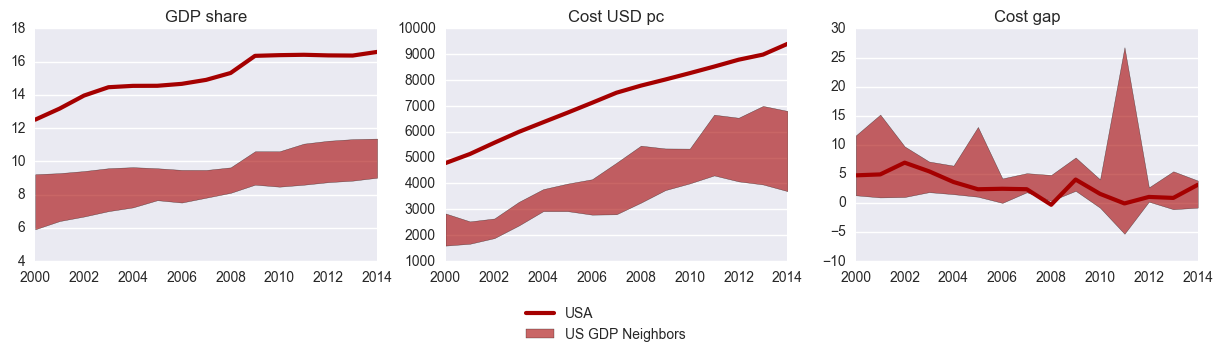

In [50]:
data = data.sortlevel(axis=1)
selection = classifiers[classifiers['US neigh'] =='Yes'].index.tolist()

colors = sns.color_palette("OrRd_r", 10)[::2]

sns.set_style('darkgrid')
plt.figure()
fig, ax = plt.subplots(1, 3, figsize=(15,3))

for var, ax in zip(cst_vars, ax):
    

    var_cost = pd.DataFrame(index=data.index)
    for year in data.index:
        var_cost.loc[year, 'Min Score'] = data.loc[year, idx[selection, 'Health Expenses', var]].min()
        var_cost.loc[year, 'Max Score'] = data.loc[year, idx[selection, 'Health Expenses', var]].max()

    idx = pd.IndexSlice

    min_line = var_cost['Min Score']
    max_line = var_cost['Max Score']
    
    ax.fill_between(var_cost.index, min_line, max_line, where=max_line > min_line, facecolor=colors[0], alpha=0.6)
    ax.set_title(var)
    ax.plot(data.loc[:, idx['USA', 'Health Expenses', var]], color=colors[0], lw=3)
    ax.grid(b=None, axis='x')
    if var == 'Cost gap':
        ax.legend(['USA', 'US GDP Neighbors'], bbox_to_anchor=(-1, -0.4), loc=3)

plt.show()

#### 2.B.b Correlation between GDP pc level and Cost <a id='2.2.2'></a>

We have previously observed a positive relationship on a group level between GDP pc and healthcare cost. Groups with a higher GDP pc had a higher average cost and weight on the economy. When we look at a country level we can also see this behavior.

Below we scatter all OECD countries. The US is very far from the regression line and confidence interval area. Any point above that area means that the cost and GDP share is higher with a 95% confidence that what would have been expected, given the provided population. The farther up, the worse the situation is. It's a bad result for America.

It's also interesting to see how the dispersion dramatically increases when reaching the economies with higher GDPs per capita.

There is a very strong positive correlation between GDP per capita and healthcare cost. There's a moderate correlation between GDP per capita and GDP healthcare share, though this correlation is significantly higher when Luxemburg and the US are removed from the data as their values differ very significantly from the rest.

GDP pc - GDP share: total correlation is 0.486672485767
GDP pc - GDP share: correlation without the US and Luxemburg is 0.788689513685

GDP pc - Cost USD pc: total correlation is 0.912434737228
GDP pc - Cost USD pc: correlation without the US and Luxemburg is 0.967311892639



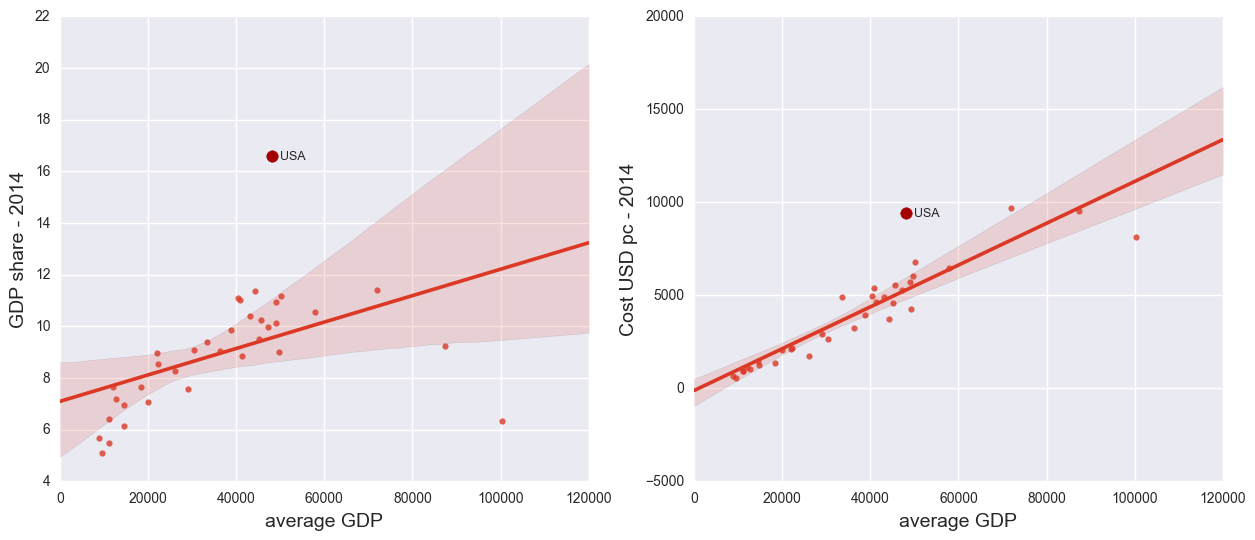

In [51]:
sns.set_style('darkgrid')
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(15,6))

X = classifiers['average GDP']

for var, ax in zip(('GDP share', 'Cost USD pc'), ax):
    Y = data.loc[2014, idx[:,'Health Expenses', var]]
    Y.index = Y.index.droplevel(level=(1,2)) # drop multindex
    Y = Y[Y.index.isin(classifiers.index)] # keep only countries and not groups
    
    US_X = X['USA']
    US_Y = Y['USA']
    
    xtrem_rsults = Y.index.isin(['USA', 'LUX'])
    
    sns.regplot(x=X, y=Y, color=colors[1], ax=ax)
    ax.scatter(US_X, US_Y, color=colors[0], s=70)
    ax.text(US_X + 1800, US_Y, 'USA', size=9, verticalalignment='center')
    ax.set_ylabel(var + " - 2014", fontsize=14)
    ax.xaxis.label.set_size(14)
    
    print "GDP pc - {}: total correlation is {}".format(var, X.corr(Y))
    print "GDP pc - {}: correlation without the US and Luxemburg is {}\n"\
            .format(
                    var, X[~xtrem_rsults].corr(Y[~xtrem_rsults])
                   )
    
plt.show()

### 2.C Analyze Health Scores <a id='2.3'></a>

We've gone through healthcare cost. Now let's look at the quality scores. For this purpose, in the previous notebook we calculated an aggregated health score that assigns a score for each country and year based on these (normalized) indicators:
- Life expectancy (50% weight in score)
- Mortality rate (25%)
- Maternal mortality rate (12.5%)
- Infant mortality rate (12.5%)

Of course this is not a perfect solution: we are using this score to assess how good a healthcare system is, but the score is not exclusively impacted by the healthcare system itself but also by many other factors: dietary habits, tobacco and alcohol consumption, sedentarism, genetics, country violence, national conflicts, etc. However it does provide useful information to our purpose.

Let's plot the results.

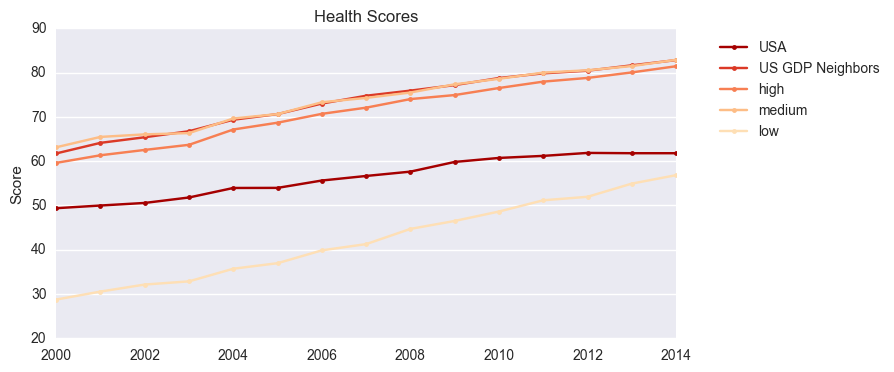

In [52]:
selection = ['USA', 'US GDP Neighbors', 'high', 'medium', 'low']

idx = pd.IndexSlice
colors = sns.color_palette("OrRd_r", 10)[::2]

plt.figure();
fig, (ax1) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(8,4))
for ctry, c in zip(selection, colors):
    ax1.set_title('Health Scores');
    ax1.plot(scores[ctry], c=c, marker='.')
    ax1.legend(selection, bbox_to_anchor=(1.05, 1), loc=2)
    ax1.set_ylabel('Score');
    ax1.grid(b=None, axis='x')

plt.show()

In [53]:
results = []

for ctry in selection:
    changes = (
               ctry,
               round(scores.loc[:, [ctry]].pct_change(14).tail(1).values[0][0]*100,1),
               round(scores.loc[2014, [ctry]] - scores.loc[2000, [ctry]],1)
              )
    results.append(changes)

results = pd.DataFrame(results, columns=['Country', 'Relative var (%)', 'Absolute var (# points)'])
results.set_index('Country', inplace=True)

results.sort_values(['Relative var (%)'], ascending=False)
    

,Relative var (%),Absolute var (# points)
Country,,
low,97.8,28.1
high,36.6,21.8
US GDP Neighbors,34.1,21.1
medium,31.3,19.7
USA,25.2,12.4


#### 2.C.a Healthcare scores results <a id='2.3.1'></a>

Back when we analyzed healthcare cost we observed a direct relation between the different healthcare cost variables and GDP pc.

However, when looking at healthcare quality scores, once passed a low gdp pc, all groups practically have identical results (let's not forget that this result is the average of the countries in that group). This seems to indicate that once reached a certain level of development, the impact of this variable (GDP pc) dilutes and rich countries doesn't necessarily have better scores that a country with a medium gdp pc. Richer countries have a slightly higher percentage of increase in their scores, but it's almost not noticeable (36,6% vs 31.3% for medium GDP). The low GDP group however shows significantly worse scores. Though tis is the group that has increased at a higher rate its scores, doubling it from 30 to almost 60 points. We're talking of almost 100% growth compared to the 37% growth of the second best result (high GDP pc). It seems to fit the law of diminishing results as we'll see later in another example. That means that it becomes harder to improve your results as you get higher scores. It's like studying an exam: it requires less effort to go from 60 to 70 than from 70 to 80.

The US again is far from its GDP neighbors and the situation gets worse as time goes by. The country has the lowest growth of the series (25% moving from 50 to aprox. 60 points) and despite being one of the richest economies in the world and having the highest healthcare cost per capita, in 2014 has almost the same score as the low GDP group.

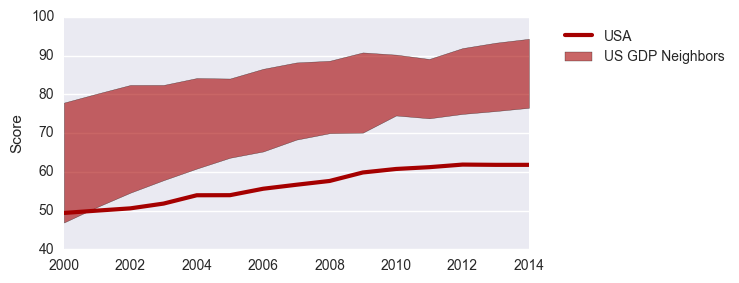

In [54]:
selection = classifiers[classifiers['US neigh'] =='Yes'].index.tolist()

var_scores = pd.DataFrame(index=scores.index)
for year in scores.index:
    var_scores.loc[year, 'Min Score'] = scores.loc[year, selection].min()
    var_scores.loc[year, 'Max Score'] = scores.loc[year, selection].max()
    
idx = pd.IndexSlice

min_line = var_scores['Min Score']
max_line = var_scores['Max Score']

colors = sns.color_palette("OrRd_r", 10)[::2]

plt.figure();
fig, (ax1) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(6,3))
ax1.fill_between(var_scores.index, min_line, max_line, where=max_line > min_line, facecolor=colors[0], alpha=0.6)
ax1.plot(scores['USA'], color=colors[0], lw=3)
ax1.set_ylabel('Score')
ax1.legend(['USA', 'US GDP Neighbors'], bbox_to_anchor=(1.05, 1), loc=2)
ax1.grid(b=None, axis='x')

plt.show()

The graph above shows in more detail the different evolution between the US and countries that are close to its GDP pc. Before we saw and average for this group, but averages can be tricky if we don't know the variation. This means that even though the US can look far from the average values, there might be countries with similar results hidden in that average if there's enough dispersion.

In the chart we see the minimum and maximum values for any given year for the US GDP neighbors group and the US. Over the years even the minimum values in the group are far higher than the US ones as the country has a flatter trend.

#### 2.C.b Healthcare score rankings <a id='2.3.2'></a>

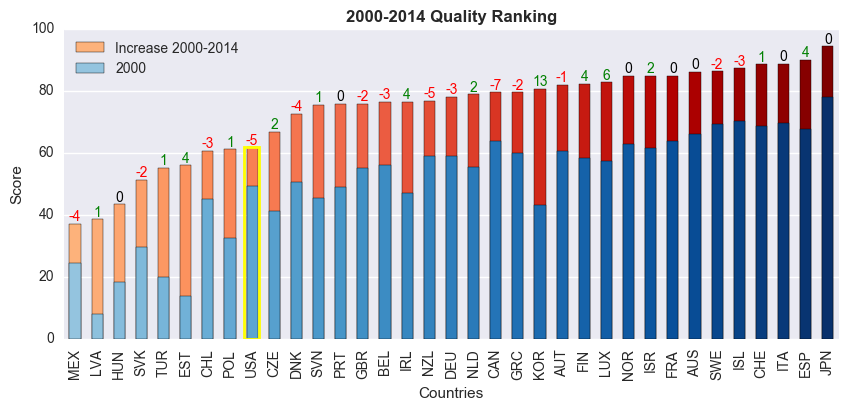

In [55]:
# select first and last year and sort dataframe
ranking = scores.loc[[2000, 2014]]
ranking = ranking.T.sort_values(2014)
ranking.drop(['low', 'medium', 'US GDP Neighbors', 'high'], inplace=True)

len_rking = len(ranking)
color_1 = cm.OrRd(np.linspace(0.4,1, len_rking))
color_2 = cm.Blues(np.linspace(0.4,1, len_rking))

plt.figure()
ranking[2014].plot(kind='bar', figsize =(10,4), color=color_1)
ranking[2000].plot(kind='bar', figsize =(10,4), color=color_2)
plt.bar(7.62, ranking.loc['USA', 2014], edgecolor='yellow', width = 0.7, linewidth=2, fill=False)
plt.grid(b=None, axis='x')
plt.title('2000-2014 Quality Ranking', fontsize=12, fontweight='bold')
plt.ylabel('Score')
plt.legend(('Increase 2000-2014', '2000'), loc=2)
plt.xlabel('Countries')

for x, i in enumerate(ranking.index):
    y = ranking.ix[i][2014]
    move = int(ranking.rank().ix[i][2014] - ranking.rank().ix[i][2000])
    plt.text(x, y, move,
             horizontalalignment='center',
             verticalalignment='bottom',
             color=('r' if move < 0 else 'g' if move > 0 else 'k')
            )
        
plt.show()

This is the ranking of countries according to their healthcare score in 2014. All countries have improved their scores from 2000. The US, despite expending more than anyone on healthcare, is on the lower side of the ranking and has lost five spots since the beginning of the millennium.

In [56]:
#show score progress by group
groups= list(set(classifiers['GDP level']))
improvmnt = pd.DataFrame(index=groups)

for group in groups:
    group_idx = classifiers[classifiers['GDP level']==group].index
    df = ranking[ranking.index.isin(group_idx)]
    
    improvmnt.loc[group, 'average score 2000'] = round(df[2000].mean(), 1)
    improvmnt.loc[group, 'average score 2010'] = round(df[2014].mean(), 1)
    improvmnt.loc[group, 'absolute increase'] = round(
                                            df[2014].sum() - df[2000].sum()
                                            , 0
                                             )
    improvmnt.loc[group, 'relative increase'] = (str(
                                           round(
                                                (df[2014].sum() - df[2000].sum()) / df[2000].sum() * 100
                                                , 1
                                                 )
                                            )
                                        + "%"
                                         )


improvmnt.sort_values('absolute increase', ascending=False)

,average score 2000,average score 2010,absolute increase,relative increase
Low GDP,30.9,58.5,331.0,89.3%
High GDP,59.1,80.1,252.0,35.6%
Medium GDP,63.6,83.3,217.0,31.0%


Looking at the increases from a group perspective, we see that Low GDP groups account for 331 points, significantly ahead of other groups. This is even more significant when calculating the relative increase, which is close to 90% while the other groups move around a 30-35%. It has almost duplicated the number of points in 2000.

This is a good example of the law of diminishing results. If a group starts with a higher average score, it becomes even harder to increase it.

#### 2.C.c Correlation between GDP per capita and Health Score <a id='2.3.3'></a>

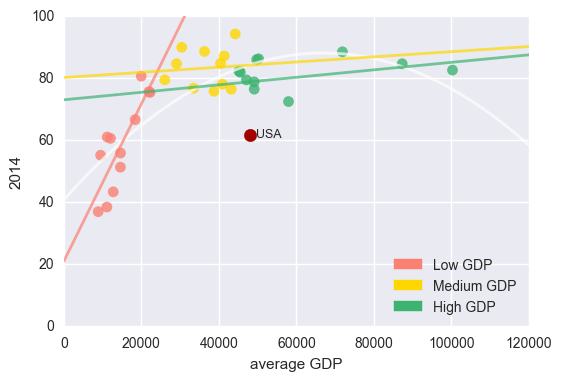

correlation: 0.621506394982


In [57]:
sns.set_style('darkgrid')

var = scores.loc[2014]
var = var[var.index.isin(classifiers.index)] # keep only countries and not groups

US_GDP = classifiers.loc['USA', 'average GDP']
US_var = var['USA']

low_gdp = classifiers['average GDP'][classifiers['GDP level'] == 'Low GDP']
low_score = var[var.index.isin(low_gdp.index)]

med_gdp = classifiers['average GDP'][classifiers['GDP level'] == 'Medium GDP']
med_score = var[var.index.isin(med_gdp.index)]

high_gdp = classifiers['average GDP'][classifiers['GDP level'] == 'High GDP']
high_score = var[var.index.isin(high_gdp.index)]

GDP_colors = {'Low GDP':'salmon', 'Medium GDP':'gold', 'High GDP':'mediumseagreen'}

gdp_c = map(
            lambda x :
            'mediumseagreen' if x=='High GDP' else
            'gold' if x=='Medium GDP' else
            'salmon',
            classifiers['GDP level']
            )

plt.figure()

sns.plt.ylim(0, 100)
for X, Y, col in zip(
                     [classifiers['average GDP'], low_gdp, med_gdp, high_gdp],
                     [var, low_score, med_score, high_score],
                     ['w', 'salmon', 'gold', 'mediumseagreen']
                    ):
    sns.regplot(x=X, y=Y, ci=None,
                order=(2 if Y is var else 1), scatter=(True if Y is var else False),
                scatter_kws={'color':gdp_c, 's':60},
                line_kws={'color':col, 'alpha':0.7, 'linewidth':2}
               )

plt.scatter(US_GDP, US_var, color=colors[0], s=80)
plt.text(US_GDP + 1500, US_var, 'USA', size=9, verticalalignment='center')

low = mpatches.Patch(color=GDP_colors['Low GDP'], label='Low GDP')
medium = mpatches.Patch(color=GDP_colors['Medium GDP'], label='Medium GDP')
high = mpatches.Patch(color=GDP_colors['High GDP'], label='High GDP')
plt.legend(handles=[low, medium, high], loc=4)

plt.show()

print "correlation: {}".format(var.corr(classifiers['average GDP']))

When we analyzed healthcare cost, we saw it was highly correlated with average GDP pc. In regards to healthcare score, there's still a moderate correlation (0.62), however it fits a logarithmic growth rather than linear this time. We can observe how the scores quickly escalate at low GDPs per capita, but once we reach a medium GDP pc it slows down an disperses. So although there's still an overall positive slope is way more flat and we observe a higher dispersion.

### 2.D Analyze Health Cost against Health Score <a id='2.4'></a>

We're going to create a scatter plot to show how healthcare cost and quality are related and compare the results of the US vs. other countries. We'll use the data from 2014 for the variables GDP share and healthcare score. We'll use the GDP share instead of the individual average USD cost as it better reflects what portion of the country's resources go to healthcare and avoids getting any wrong conclusions due to the impact of inflation.

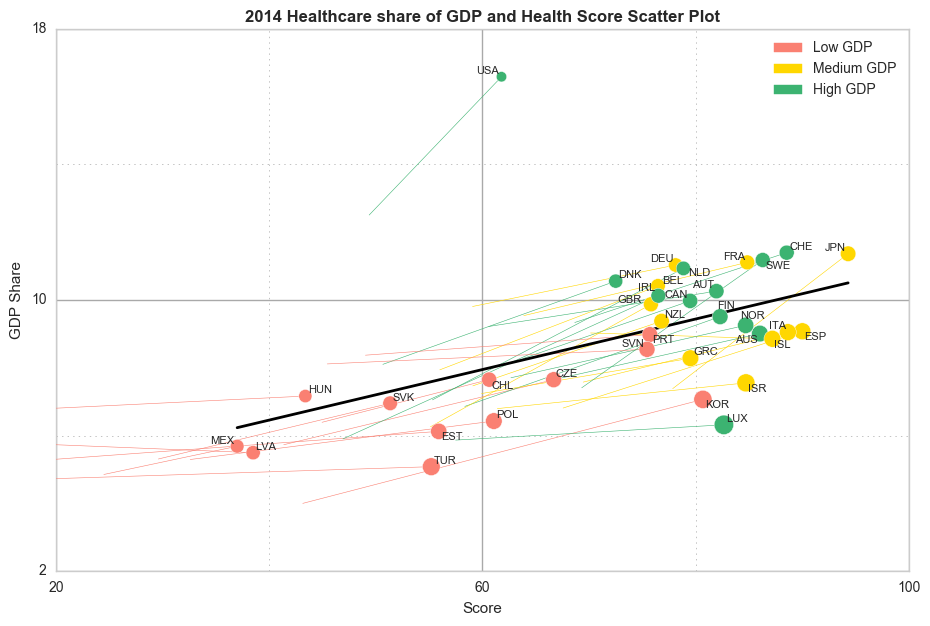

In [58]:
# load axis
X = scores.loc[2014]
X2 = scores.loc[2000]
Y = data.loc[2014, (slice(None), slice(None), 'GDP share')]
Y2 = data.loc[2000, (slice(None), slice(None), 'GDP share')]

# remove GDP groups from data
remove = ['low', 'medium', 'high', 'US GDP Neighbors']
for n in [X, X2, Y, Y2]:
    n.drop(remove, inplace=True)
    
# define color and size of dots
GDP_colors = {'Low GDP':'salmon', 'Medium GDP':'gold', 'High GDP':'mediumseagreen'}
dots_colors = c=classifiers['GDP level'].apply(lambda x: GDP_colors[x])
sizes = (X.values / Y.values)*15

# plot scatter
sns.set_style('whitegrid')
plt.figure(figsize=(11,7))
plt.scatter(X, Y, s=sizes, edgecolor='w', c=dots_colors, zorder=5)

# plot regression line
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), c='black', linewidth=2, zorder=4)

# set x and y ticks
plt.xlim([20, 100])
plt.ylim([2, 18])
plt.xticks(np.arange(20, 101, 40))
plt.yticks(np.arange(2, 19, 8))

# Adjust major grid
plt.grid(which='major', linewidth=1, color='darkgray', zorder=2)

# Add minor grig
for x, y in zip((40,80), (6,14)):
    plt.axvline(x, linewidth=0.5, linestyle=':', color='darkgray', zorder=1)
    plt.axhline(y, linewidth=0.5, linestyle=':', color='darkgray', zorder=1)

# add labels
labels = X.index.tolist()
texts = []
for x, y, text in zip(X, Y, labels):
    texts.append(plt.text(x, y, text, size=8, zorder=6))
adjust_text(texts, force_text=.6)

# add legend
low = mpatches.Patch(color=GDP_colors['Low GDP'], label='Low GDP')
medium = mpatches.Patch(color=GDP_colors['Medium GDP'], label='Medium GDP')
high = mpatches.Patch(color=GDP_colors['High GDP'], label='High GDP')
plt.legend(handles=[low, medium, high], loc=1)

# add title and axis labels
plt.title('2014 Healthcare share of GDP and Health Score Scatter Plot', fontsize=12, fontweight='bold')
plt.ylabel('GDP Share')
plt.xlabel('Score')

# add lines of evolution (2000-2014)
for x, y, x2, y2, c in zip(X, Y, X2, Y2, dots_colors):
    plt.plot((x,x2), (y,y2), c=c, linewidth=.4, zorder=3, linestyle='-')
    

plt.show()

On the vertical axis we have GDP Share and on the horizontal axis the healthcare score. The chart basically displays how good the quality results in a country are, and how efficiently those results are achieved (thus using a smaller portion of its GDP). In other words, the closer to the lower right corner, the better.

The countries are colored by GDP income to facilitate identifying GDP group trends.


The area of each dot represents the ratio between cost and quality. A bigger area means the country is more efficient in relation to others with smaller areas.

The lines represent the evolution for the given country from 2000 to 2014.

The thick, black line is the linear regression. We can observe a positive relationship between GDP share and quality. Below and approx. GDP share of 8% is hard to get a score higher than 80 (although there are some exceptions). However there's a fair amount of dispersion. The line represents the expected score values to any given GDP share and vice versa. Being under the line means exceeding that expected performance, but the US is completely the opposite case. It's by far the more distant point to the line. This doesn't come as a surprise as the US previously showed the highest cost but a very low healthcare score. The US is spending more than any other country getting extremely poor results. It looks like an anomaly in the dataset.

The trails behind each dot show the evolution between 2000 to 2014. All countries have improved their scores during that period, but the slope shows how efficient that evolution is - as it shows how much the cost is increasing as well in comparison. Very high positive slopes are bad news. It means that for a small increase in the score, the country is increasing a lot of the percentage of the GDP assigned to healthcare. That's the case in the US. A slope higher than the regression line underperforms against the population average. That's again the case of the US. We can see that a few lucky countries have negative slopes. We'll dig into this in the next chart.

This chart in a way summarizes the whole study. Low GDP countries have worse scores but have been very efficient increasing their scores over time without expending a lot more. Once countries reach a medium GDP pc the impact of this variable in the scores dilute: being medium or high GDP pc doesn't seem to affect a whole lot. The same can be said for the GDP share. The US is clearly the great outlier with a cost that doesn't seem to be justified by its poor health results. Overall countries dedicate more of their GDP share to healthcare but also have improved their results. These two variables might be retrofitting: as health improves people live longer and the elderly require higher expenditures in healthcare.

In [59]:
for n in [Y, Y2]:
    n.reset_index(level=(1,2), drop=True, inplace=True)

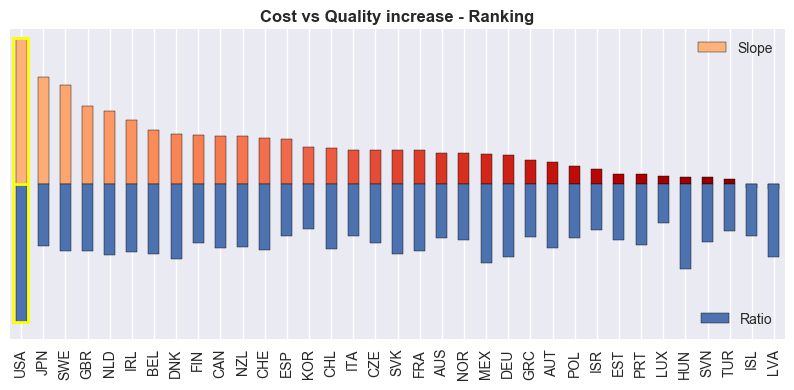

In [60]:
slope = (Y-Y2)/(X-X2)
slope.sort_values(ascending=False, inplace=True)

ratio = -Y/X
ratio = ratio.align(slope, join='right')
ratio = ratio[0]

sns.set_style('darkgrid')

fig, ax1 = plt.subplots()

ax1 = slope.plot(kind='bar', figsize =(10,4), color=color_1)
ax1.bar(-0.38, slope.loc['USA'], edgecolor='yellow', width = 0.7, linewidth=2, fill=False)

ax2 = ax1.twinx()
ax2 = ratio.plot(kind='bar')
ax2.bar(-0.38, ratio.loc['USA'], edgecolor='yellow', width = 0.7, linewidth=2, fill=False)

ax1.set_ylim(-0.35, 0.35)
ax2.set_ylim(-0.3, 0.3)
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax1.set_yticks([])
ax2.set_yticks([])

plt.title('Cost vs Quality increase - Ranking', fontsize=12, fontweight='bold')
ax1.legend(['Slope'], loc=1)
ax2.legend(['Ratio'], loc=4)

plt.show()

In the previous chart we saw that the dot's tale represented the evolution from 2000 to 2014 of each country. As the line positively inclines, the effiency of a country in improving its healthcare scores reduces, as it needs to allocate a bigger piece of its GDP to this industry. The US was not looking good from this perspective and above these lines there's a more precise chart that digs on this issue.

In orange we have that line slope that measures the relation of the GDP share increase vs. the Health Score increase from 2000 to 2014. The US has the highest slope of all countries, which means that its healthcare costs have increased more in relation to its health scores than any other country.

In blue there's the ratio GDP share / Health Score in 2014. The US has the worst ratio as its GDP share is higher in relation to its health score than any other country.

### 2.E Conclusion <a id='2.5'></a>

Throughout the entire study the US results stand as very poor. The country has the highest healthcare cost of all OECD countries and the healthcare share of the GDP is almost a 50% higher than the second highest country in the study, Switzerland. The cost gap between the US and other countries has remain stable. However, while all countries have significantly improved their health scores, the US has experienced the slowest increase in the study. __When combined the highest cost with the poor health scores obtained, the US is by far the country with the worst relation between healthcare cost and quality in the OECD.__